<a href="https://colab.research.google.com/github/abdyraman/NaiveBayes/blob/main/NaiveBayesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files
df=pd.read_csv('adult.csv')

In [70]:
#We can see that there are 32560 instances and 15 attributes in the data set.
df.shape

(32560, 15)

In [71]:
# preview the dataset
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [72]:
#Renaiming columns
col_names = ['age', 'workclass', 'wage', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = col_names


In [73]:
df.tail()

,age,workclass,wage,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   wage            32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [75]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [76]:
# view frequency counts of values in categorical variables
for var in categorical:
    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [77]:
# check missing values in categorical variables

df[categorical].isnull().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0
income,0


In [78]:
# view frequency distribution of categorical variables

for var in categorical:

    print(df[var].value_counts()/float(len(df)))

workclass
Private             0.697052
Self-emp-not-inc    0.078041
Local-gov           0.064281
?                   0.056388
State-gov           0.039834
Self-emp-inc        0.034275
Federal-gov         0.029484
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64
education
HS-grad         0.322512
Some-college    0.223925
Bachelors       0.164435
Masters         0.052918
Assoc-voc       0.042445
11th            0.036087
Assoc-acdm      0.032770
10th            0.028655
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013299
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: count, dtype: float64
marital_status
Married-civ-spouse       0.459951
Never-married            0.328071
Divorced                 0.136456
Separated                0.031480
Widowed                  0.030498
Married-spouse-absent    0.012838
Married-AF-spouse        0.000706
Name: coun

Now, we can see that there are several variables like workclass, occupation and native_country which contain missing values. Generally, the missing values are coded as NaN and python will detect them with the usual command of df.isnull().sum().

But, in this case the missing values are coded as ?. Python fail to detect these as missing values because it do not consider ? as missing values. So, I have to replace ? with NaN so that Python can detect these missing values.

I will explore these variables and replace ? with NaN.

Explore workclass variable

In [79]:
# check labels in workclass variable

df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [80]:
# check frequency distribution of values in workclass variable

df.workclass.value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1297
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [81]:
df['workclass']= df['workclass'].str.strip().replace('?', np.NaN)


In [82]:
# check frequency distribution of values in workclass variable

df.workclass.value_counts()


,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1297
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


Explore Occupation variable

In [83]:
# check labels in occupation variable

df.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [84]:
# check frequency distribution of values in occupation variable

df.occupation.value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3769
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [85]:
#We can see that there are 1843 values encoded as ? in occupation variable. I will replace these ? with NaN.
df['occupation']= df['occupation'].str.strip().replace('?', np.NaN)


Explore native_country variable

In [86]:
# check labels in native_country variable

df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [87]:
# check frequency distribution of values in native_country variable

df.native_country.value_counts()

,count
native_country,
United-States,29169
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [88]:
#We can see that there are 1843 values encoded as ? in occupation variable. I will replace these ? with NaN.
df['native_country']= df['native_country'].str.strip().replace('?', np.NaN)

In [89]:
#Check missing values in categorical variables again
df[categorical].isnull().sum()

,0
workclass,1836
education,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0
native_country,583
income,0


Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [90]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


We can see that native_country column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

Explore Numerical Variables

In [91]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'wage', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [92]:
# check missing values in numerical variables

df[numerical].isnull().sum()

,0
age,0
wage,0
education_num,0
capital_gain,0
capital_loss,0
hours_per_week,0


8. Declare feature vector and target variable

In [93]:
X = df.drop(['income'], axis=1)
y = df['income']

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [95]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((22792, 14), (9768, 14))

In [96]:
# check data types in X_train

X_train.dtypes

,0
age,int64
workclass,object
wage,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


Engineering missing values in categorical variables

In [97]:
categorical = [col for col in categorical if col != 'income']
missing_percent = X_train[categorical].isnull().mean() * 100
print(missing_percent)


workclass         5.721306
education         0.000000
marital_status    0.000000
occupation        5.738856
relationship      0.000000
race              0.000000
sex               0.000000
native_country    1.825202
dtype: float64


In [98]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.057213057213057215
occupation 0.05738855738855739
native_country 0.018252018252018252


In [99]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2.loc[:, 'workclass'] = df2['workclass'].fillna(X_train['workclass'].mode()[0])
    df2.loc[:, 'occupation'] = df2['occupation'].fillna(X_train['occupation'].mode()[0])
    df2.loc[:, 'native_country'] = df2['native_country'].fillna(X_train['native_country'].mode()[0])


In [100]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


In [101]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


In [102]:
X_train.isnull().sum()

,0
age,0
workclass,0
wage,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [103]:
X_test.isnull().sum()

,0
age,0
workclass,0
wage,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


Encoding categorical variables

In [104]:
!pip install category_encoders

In [105]:
import category_encoders as ce

# Define encoder
encoder = ce.OneHotEncoder(
    cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
          'race', 'sex', 'native_country'],
    use_cat_names=True  # Ensures column names remain interpretable
)

# Fit on training data & transform
X_train_encoded = encoder.fit_transform(X_train)

# Transform test data
X_test_encoded = encoder.transform(X_test)


Feature Scaling

In [107]:
cols = X_train_encoded.columns

In [108]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()

# Fit on training data & transform
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test_encoded)


In [109]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=cols)


In [111]:
X_train_scaled.isnull()

,age,workclass_Self-emp-inc,workclass_Private,workclass_State-gov,workclass_Federal-gov,workclass_Self-emp-not-inc,workclass_Local-gov,workclass_Never-worked,workclass_Without-pay,wage,...,native_country_Honduras,native_country_South,native_country_Iran,native_country_Trinadad&Tobago,native_country_Laos,native_country_France,native_country_Peru,native_country_Hungary,native_country_Scotland,native_country_Holand-Netherlands
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22788,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22789,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22790,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Model training

In [112]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_scaled, y_train)

GaussianNB()

Predict the results

In [114]:
y_pred = gnb.predict(X_test_scaled)
y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

Check accuracy score

In [115]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8164


In [117]:
y_pred_train = gnb.predict(X_train_scaled)
y_pred_train

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [118]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8089


In [120]:
print('Training set score: {:.4f}'.format(gnb.score(X_train_scaled, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test_scaled, y_test)))

Training set score: 0.8089
Test set score: 0.8164


The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8083. These two values are quite comparable. So, there is no sign of overfitting.

Compare model accuracy with null accuracy¶
So, the model accuracy is 0.8083. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [122]:
# check class distribution in test set

y_test.value_counts()

,count
income,
<=50K,7454
>50K,2314


We can see that the occurences of most frequent class is 7407. So, we can calculate null accuracy by dividing 7407 by total number of occurences.

In [123]:
# check null accuracy score

null_accuracy = (7454/(7454+2314))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7631


We can see that our model accuracy score is 0.8083 but null accuracy score is 0.7582. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [124]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6105 1349]
 [ 444 1870]]

True Positives(TP) =  6105

True Negatives(TN) =  1870

False Positives(FP) =  1349

False Negatives(FN) =  444


The confusion matrix shows 6105 + 1870 = 7975 correct predictions and 1349 + 444 = 1793 incorrect predictions.

In this case, we have

False Positives (Actual Negative:0 but Predict Positive:1) - 1349 (Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 444 (Type II error)

<Axes: >

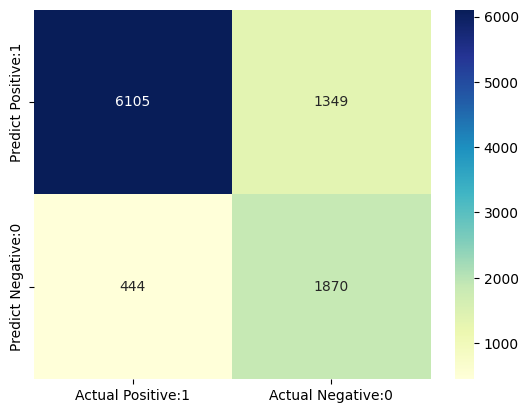

In [125]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification metrices